<h1><strong><u>K-Nearest Neighbors Model Selection</u></strong></h1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, validation_curve
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

<h2><u>Data Loading</u></h2>

In [3]:
df = pd.DataFrame(columns=["title", "target"])

In [4]:
# Formatting text files
titles = []
targets = []
file_path_dict = {'clickbait': './clickbait_data.txt', 'non clickbait': './non_clickbait_data.txt'}
for key, value in file_path_dict.items():
    with open(value, 'r') as file:
        for line_number, line in enumerate(file):
            line = line.strip()
            if line != "":
                titles.append(line)
                targets.append(key)
data_dict = {"title": titles, "target": targets}
df = pd.DataFrame(data_dict)


In [5]:
data = df.sample(frac=1).reset_index(drop=True)
display(data)

,title,target
0,"On State Secrets, Obama Is Sounding Like Bush",non clickbait
1,This Artist Has Perfectly Reimagined Disney An...,clickbait
2,Identity Theft Hits Close to Home for a Sheriff,non clickbait
3,"The Girl Who Plays Sansa Stark On ""Game Of Thr...",clickbait
4,23 Things Teachers Actually Want For Christmas,clickbait
...,...,...
31995,Do Online Universities Have Virtual Cheerleaders?,non clickbait
31996,If Nancy Drew Had Instagram,clickbait
31997,"Meet Gar Ryness, the Batting Stance Guy",non clickbait
31998,U.S. to Use Bailout Repayments to Aid Small Banks,non clickbait


In [6]:
X = data["title"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(25600,)

(6400,)

(25600,)

(6400,)

In [7]:
def custom_tokenizer(text):
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        import re
        en_stopwords = stopwords.words('english')
        lemmatizer = WordNetLemmatizer()
        new_text = text.lower() #lowercase

        new_text = re.sub(r"([^\w\s])", "", new_text) #remove punctuation

        for word in new_text.split(): #remove stopwords
            if word in en_stopwords:
                new_text = new_text.replace(word, "")
        
        new_text = word_tokenize(new_text) #tokenize

        new_text = [lemmatizer.lemmatize(token) for token in new_text] #lemmatize
        return new_text

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

I believe that the <strong>BernoulliNB</strong> model is the best Naive Bayes model for this dataset because it is designed for binary/boolean features which is what this dataset has.

<h3><u>Validation Curves</u></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ..................................clf__alpha=0.0001; total time=  15.0s
[CV] END ......................................clf__alpha=10; total time=  14.4s
[CV] END .....................................clf__alpha=0.1; total time=  14.7s
[CV] END ..................................clf__alpha=0.0001; total time=  14.8s
[CV] END .......................................clf__alpha=1; total time=  14.3s
[CV] END ...................................clf__alpha=0.001; total time=  14.7s
[CV] END ...................................clf__alpha=0.001; total time=  14.9s
[CV] END ....................................clf__alpha=0.01; total time=  14.9s
[CV] END ....................................clf__alpha=0.01; total time=   7.1s
[CV] END ...................................clf__alpha=0.001; total time=   6.8s
[CV] END .......................................clf__alpha=1; total time=   7.0s
[CV] END .....................................clf__alpha=0.1; total time=   7.1s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   37.9s remaining:   37.9s


[CV] END .....................................clf__alpha=0.1; total time=   7.1s
[CV] END .......................................clf__alpha=1; total time=   6.7s
[CV] END ...................................clf__alpha=0.001; total time=   6.6s
[CV] END ..................................clf__alpha=0.0001; total time=   6.7s
[CV] END .....................................clf__alpha=0.1; total time=   6.7s
[CV] END ....................................clf__alpha=0.01; total time=   7.0s
[CV] END ......................................clf__alpha=10; total time=   7.4s
[CV] END .......................................clf__alpha=1; total time=   7.1s
[CV] END ......................................clf__alpha=10; total time=   6.9s
[CV] END ...................................clf__alpha=0.001; total time=   5.8s
[CV] END ..................................clf__alpha=0.0001; total time=   5.8s
[CV] END ....................................clf__alpha=0.01; total time=   6.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


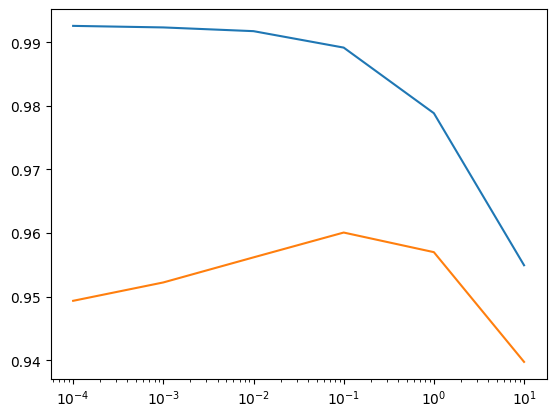

In [ ]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficients' Validation Curve</u></h4>
The shape of this plot suggest that the optimal range for generalization is between 0.1-10. I believe the best regularization coefficient is between 1-10 because that is where the slope of the two line appears the most similar.

<h3><u>Cross Validation Testing</u></h3>

In [12]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", BernoulliNB())
    ]
)
param_grid = {
    "clf__alpha": [1, 3, 5, 7, 9],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
nb_classifier = model.best_estimator_
model.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................clf__alpha=1;, score=0.957 total time=   8.4s
[CV 2/5] END ......................clf__alpha=1;, score=0.954 total time=   8.5s
[CV 4/5] END ......................clf__alpha=1;, score=0.954 total time=   8.5s
[CV 3/5] END ......................clf__alpha=1;, score=0.960 total time=   8.7s
[CV 1/5] END ......................clf__alpha=3;, score=0.951 total time=   8.6s
[CV 3/5] END ......................clf__alpha=3;, score=0.954 total time=   8.6s
[CV 5/5] END ......................clf__alpha=1;, score=0.960 total time=   8.9s
[CV 2/5] END ......................clf__alpha=3;, score=0.948 total time=   8.8s
[CV 5/5] END ......................clf__alpha=3;, score=0.954 total time=   7.0s
[CV 1/5] END ......................clf__alpha=5;, score=0.945 total time=   7.0s
[CV 4/5] END ......................clf__alpha=3;, score=0.950 total time=   7.3s
[CV 3/5] END ......................clf__alpha=5;,

{'clf__alpha': 1}

<h3><strong><u>Learning Curve</u></strong></h4>

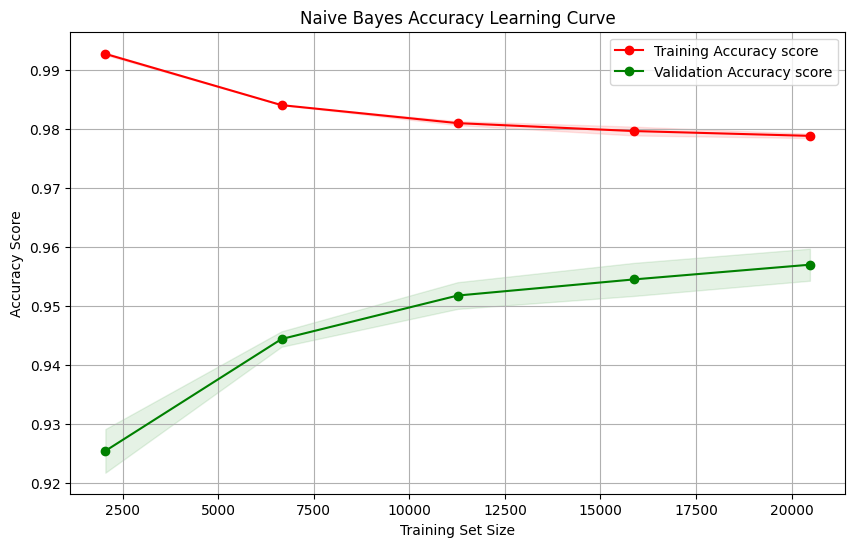

In [13]:
nb_train_sizes, nb_train_scores, nb_validation_scores = learning_curve(
    nb_classifier,
    X_train,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

# Calculate mean and standard deviation for scores
nb_train_scores_mean = np.mean(nb_train_scores, axis=1)
nb_train_scores_std = np.std(nb_train_scores, axis=1)
nb_validation_scores_mean = np.mean(nb_validation_scores, axis=1)
nb_validation_scores_std = np.std(nb_validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Naive Bayes Accuracy Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(nb_train_sizes, nb_train_scores_mean - nb_train_scores_std,
                nb_train_scores_mean + nb_train_scores_std, alpha=0.1, color="r")
plt.fill_between(nb_train_sizes, nb_validation_scores_mean - nb_validation_scores_std,
                nb_validation_scores_mean + nb_validation_scores_std, alpha=0.1, color="g")
plt.plot(nb_train_sizes, nb_train_scores_mean, 'o-', color="r",
            label="Training Accuracy score")
plt.plot(nb_train_sizes, nb_validation_scores_mean, 'o-', color="g",
            label="Validation Accuracy score")

plt.legend(loc="best")
plt.show()